In [ ]:
!pip install --upgrade transformers pandas torch tqdm nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving dev.txt to dev.txt
Saving test.txt to test.txt
Saving train.txt to train.txt


In [ ]:
import pandas as pd
import nltk
from nltk import Tree

# Function to parse SST PTB format
def parse_sst_file(filepath):
    """Extracts labeled sentences from SST PTB format dataset."""
    data = []

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            try:
                tree = Tree.fromstring(line.strip())  # Parse the tree
                label = int(tree.label())  # Extract sentiment label
                sentence = " ".join(tree.leaves())  # Extract words
                data.append((sentence, label))
            except Exception as e:
                print(f"Error parsing line: {e}")

    return pd.DataFrame(data, columns=["sentence", "label"])

# Load dataset from uploaded files
train_df = parse_sst_file("train.txt")
dev_df = parse_sst_file("dev.txt")
test_df = parse_sst_file("test.txt")

# Combine all splits into a single dataset
sst_df = pd.concat([train_df, dev_df, test_df], ignore_index=True)

# Display the first few rows
print(sst_df.head())


                                            sentence  label
0  The Rock is destined to be the 21st Century 's...      3
1  The gorgeously elaborate continuation of `` Th...      4
2  Singer\/composer Bryan Adams contributes a sle...      3
3  You 'd think by now America would have had eno...      2
4               Yet the act is still charming here .      3


In [ ]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu124
    Uninstalling torchvision-0.20.1+cu124:
      Successfully uninstalled torchvision-0.20.1+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu124
    Uninstalling torchaudio-2.5.1+cu124:
      Successfully uninstalled torchaudio-2.5.1+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 

In [ ]:
from transformers import pipeline

# Load the pre-trained DistilBERT model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=0)

print("Pre-trained Sentiment Model Loaded Successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Pre-trained Sentiment Model Loaded Successfully!


In [ ]:
import pandas as pd
import nltk
from nltk import Tree

# Function to parse SST PTB format
def parse_sst_file(filepath):
    """Extracts labeled sentences from SST PTB format dataset."""
    data = []

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            try:
                tree = Tree.fromstring(line.strip())  # Parse the tree
                label = int(tree.label())  # Extract sentiment label
                sentence = " ".join(tree.leaves())  # Extract words
                data.append((sentence, label))
            except Exception as e:
                print(f"Error parsing line: {e}")

    return pd.DataFrame(data, columns=["sentence", "label"])

# Load dataset (Make sure the files are uploaded in Colab)
train_df = parse_sst_file("train.txt")
dev_df = parse_sst_file("dev.txt")
test_df = parse_sst_file("test.txt")

# Combine all splits into a single dataset
sst_df = pd.concat([train_df, dev_df, test_df], ignore_index=True)

# Display the first few rows
print(sst_df.head())  # Should print first few rows of SST dataset


                                            sentence  label
0  The Rock is destined to be the 21st Century 's...      3
1  The gorgeously elaborate continuation of `` Th...      4
2  Singer\/composer Bryan Adams contributes a sle...      3
3  You 'd think by now America would have had eno...      2
4               Yet the act is still charming here .      3


In [ ]:
from tqdm.auto import tqdm  # Use tqdm.auto for compatibility

batch_size = 16  # Adjust for speed

# Convert sentences into a list
sentences = sst_df["sentence"].tolist()

# Apply sentiment analysis in batches
predictions = []
for i in tqdm(range(0, len(sentences), batch_size), desc="Processing Sentences"):
    batch = sentences[i : i + batch_size]  # Get batch
    results = classifier(batch)  # Run classifier
    predictions.extend([res['label'] for res in results])  # Store results

# Add predictions to the dataframe
sst_df["predicted_sentiment"] = predictions

# Display first few results
print(sst_df.head())


Processing Sentences:   0%|          | 0/741 [00:00<?, ?it/s]

                                            sentence  label  \
0  The Rock is destined to be the 21st Century 's...      3   
1  The gorgeously elaborate continuation of `` Th...      4   
2  Singer\/composer Bryan Adams contributes a sle...      3   
3  You 'd think by now America would have had eno...      2   
4               Yet the act is still charming here .      3   

  predicted_sentiment  
0            POSITIVE  
1            POSITIVE  
2            POSITIVE  
3            POSITIVE  
4            POSITIVE  


In [ ]:
print("Total sentences in SST dataset:", len(sst_df))
print(sst_df.head())  # Check if the dataset looks correct


Total sentences in SST dataset: 11855
                                            sentence  label  \
0  The Rock is destined to be the 21st Century 's...      3   
1  The gorgeously elaborate continuation of `` Th...      4   
2  Singer\/composer Bryan Adams contributes a sle...      3   
3  You 'd think by now America would have had eno...      2   
4               Yet the act is still charming here .      3   

  predicted_sentiment  
0            POSITIVE  
1            POSITIVE  
2            POSITIVE  
3            POSITIVE  
4            POSITIVE  


In [ ]:
import pandas as pd

# Show all rows in Pandas output
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns

# Print all sentences with their predicted sentiment
print(sst_df[["sentence", "predicted_sentiment"]])


                                                sentence predicted_sentiment
0      The Rock is destined to be the 21st Century 's...            POSITIVE
1      The gorgeously elaborate continuation of `` Th...            POSITIVE
2      Singer\/composer Bryan Adams contributes a sle...            POSITIVE
3      You 'd think by now America would have had eno...            POSITIVE
4                   Yet the act is still charming here .            POSITIVE
5      Whether or not you 're enlightened by any of D...            POSITIVE
6      Just the labour involved in creating the layer...            POSITIVE
7      Part of the charm of Satin Rouge is that it av...            POSITIVE
8      a screenplay more ingeniously constructed than...            POSITIVE
9               `` Extreme Ops '' exceeds expectations .            POSITIVE
10     Good fun , good action , good acting , good di...            POSITIVE
11     You Should Pay Nine Bucks for This : Because y...            POSITIVE

In [ ]:
# Save sentences with predictions to a CSV file
sst_df[["sentence", "predicted_sentiment"]].to_csv("SST_all_sentences.csv", index=False)

print("All sentences saved to 'SST_all_sentences.csv'")


All sentences saved to 'SST_all_sentences.csv'


<ipython-input-10-dd618b1dfda3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


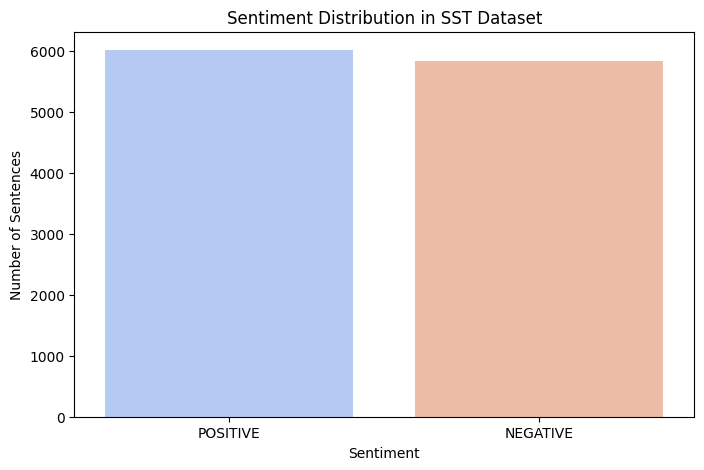

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of each sentiment type
sentiment_counts = sst_df["predicted_sentiment"].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentences")
plt.title("Sentiment Distribution in SST Dataset")
plt.show()


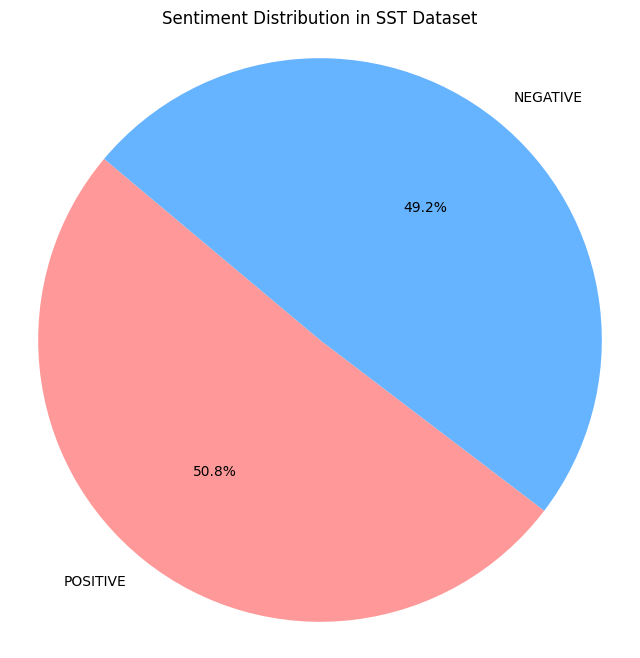

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each sentiment type
sentiment_counts = sst_df["predicted_sentiment"].value_counts()

# Define colors for the pie chart
colors = ["#ff9999", "#66b3ff", "#99ff99"]  # Red, Blue, Green

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Distribution in SST Dataset")
plt.axis("equal")  # Ensures the pie chart is a circle
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Convert labels to categorical (SST labels range from 0 to 4)
label_mapping = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEUTRAL", 3: "POSITIVE", 4: "POSITIVE"}
sst_df["true_sentiment"] = sst_df["label"].map(label_mapping)

# Compute accuracy
accuracy = accuracy_score(sst_df["true_sentiment"], sst_df["predicted_sentiment"])
print(f"Model Accuracy: {accuracy:.4f}")

# Show a classification report
print(classification_report(sst_df["true_sentiment"], sst_df["predicted_sentiment"]))


Model Accuracy: 0.7874
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.97      0.86      4650
     NEUTRAL       0.00      0.00      0.00      2242
    POSITIVE       0.80      0.98      0.88      4963

    accuracy                           0.79     11855
   macro avg       0.52      0.65      0.58     11855
weighted avg       0.64      0.79      0.71     11855



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install streamlit

import streamlit as st
from transformers import pipeline

# Load model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Streamlit app
st.title("Sentiment Analysis Web App")

user_input = st.text_area("Enter a sentence:")
if st.button("Analyze Sentiment"):
    result = classifier(user_input)
    st.write(f"Predicted Sentiment: {result[0]['label']} (Confidence: {result[0]['score']:.2f})")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


Device set to use cpu
2025-03-05 19:36:49.026 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-05 19:36:49.177 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-05 19:36:49.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-05 19:36:49.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-05 19:36:49.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-05 19:36:49.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-05 19:36:49.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-05 19:36:49.185 S

In [ ]:
!pip install streamlit pyngrok



In [ ]:
!pip install streamlit transformers torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# Load the pre-trained sentiment analysis model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Streamlit app layout
st.title("Sentiment Analysis Web App")
st.write("Enter a sentence below to analyze its sentiment:")

# Text input box
user_input = st.text_area("Enter your text here:")

# Analyze sentiment when button is clicked
if st.button("Analyze Sentiment"):
    if user_input.strip():
        result = classifier(user_input)
        st.subheader(f"Sentiment: {result[0]['label']}")
        st.write(f"Confidence Score: {result[0]['score']:.4f}")
    else:
        st.warning("Please enter a sentence before analyzing.")


Writing app.py


In [ ]:
!pip install pyngrok


In [ ]:
!ngrok authtoken 2tuYzqHT1NcKEgBPIijkShuDhuA_4sPN2dzD9Wyxhgqxg8te1


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import time
import threading
from pyngrok import ngrok

# Kill any previous ngrok processes
!pkill -f ngrok

# Start Streamlit in a separate thread
def run_streamlit():
    !streamlit run app.py --server.port 8501 --browser.gatherUsageStats False

thread = threading.Thread(target=run_streamlit)
thread.start()

# Wait for Streamlit to start
time.sleep(5)

# Open a public URL for the app
ngrok_tunnel = ngrok.connect(8501, "http")
print(f"Access your Sentiment Analysis Web App here: {ngrok_tunnel.public_url}")



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.203.9:8501

Access your Sentiment Analysis Web App here: https://a1ed-34-143-203-9.ngrok-free.app


In [ ]:
import os
print("Files in current directory:", os.listdir())


Files in current directory: ['.config', 'app.py', 'sample_data']


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select train.txt, dev.txt, and test.txt


Saving dev.txt to dev.txt
Saving test.txt to test.txt
Saving train.txt to train.txt


In [ ]:
import pandas as pd
import nltk
from nltk import Tree

# Function to parse SST files
def parse_sst_file(filepath):
    """Extracts labeled sentences from SST PTB format dataset."""
    data = []

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            try:
                tree = Tree.fromstring(line.strip())  # Parse tree
                label = int(tree.label())  # Extract sentiment label
                sentence = " ".join(tree.leaves())  # Extract words
                data.append((sentence, label))
            except Exception as e:
                print(f"Error parsing line: {e}")

    return pd.DataFrame(data, columns=["sentence", "label"])

# Load dataset (Make sure all three files exist)
train_df = parse_sst_file("train.txt")
dev_df = parse_sst_file("dev.txt")
test_df = parse_sst_file("test.txt")

# Combine all splits into a single dataset
sst_df = pd.concat([train_df, dev_df, test_df], ignore_index=True)

# Check dataset size
print("Total sentences in SST dataset:", len(sst_df))


Total sentences in SST dataset: 11855


In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm

# Load sentiment analysis model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Batch process to speed up analysis
batch_size = 16  # Adjust for speed
sentences = sst_df["sentence"].tolist()
predictions = []

for i in tqdm(range(0, len(sentences), batch_size), desc="Processing Sentences"):
    batch = sentences[i : i + batch_size]  # Get batch
    results = classifier(batch)  # Run classifier
    predictions.extend([res['label'] for res in results])  # Store results

# Save predictions
sst_df["predicted_sentiment"] = predictions

# Confirm predictions exist
print(sst_df.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


Processing Sentences:   0%|          | 0/741 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                            sentence  label  \
0  The Rock is destined to be the 21st Century 's...      3   
1  The gorgeously elaborate continuation of `` Th...      4   
2  Singer\/composer Bryan Adams contributes a sle...      3   
3  You 'd think by now America would have had eno...      2   
4               Yet the act is still charming here .      3   

  predicted_sentiment  
0            POSITIVE  
1            POSITIVE  
2            POSITIVE  
3            POSITIVE  
4            POSITIVE  


In [ ]:
sst_df[["sentence", "predicted_sentiment"]].to_csv("SST_all_sentences.csv", index=False)

print("All sentences saved to 'SST_all_sentences.csv'")

# Download the CSV file
from google.colab import files
files.download("SST_all_sentences.csv")


All sentences saved to 'SST_all_sentences.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
pip install streamlit transformers pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [5]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# Load a pre-trained BERT model for sentiment analysis
sentiment_classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Streamlit UI
st.title("Sentiment Analysis Using Transformers 🌍")
st.write("Enter a sentence below to analyze its sentiment:")

# User Input
user_input = st.text_area("Enter your text:")

if st.button("Analyze Sentiment"):
    if user_input.strip():
        result = sentiment_classifier(user_input)
        st.subheader(f"Sentiment: {result[0]['label']}")
        st.write(f"Confidence Score: {result[0]['score']:.4f}")
    else:
        st.warning("Please enter a sentence before analyzing.")

Overwriting app.py


In [6]:
from pyngrok import ngrok

ngrok.set_auth_token("2ws9IkPLWaq3zwMM6GI1POHSZs0_2EQfPi6MsiEQndr5WXzr7")

In [7]:
import time
import threading
import os

# Function to run Streamlit
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501 --browser.gatherUsageStats False")

# Start Streamlit in a separate thread
thread = threading.Thread(target=run_streamlit)
thread.start()

# Wait for Streamlit to start
time.sleep(5)

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print(f"🌍 Access your Sentiment Analysis app here: {public_url}")

🌍 Access your Sentiment Analysis app here: NgrokTunnel: "https://e952-34-127-74-192.ngrok-free.app" -> "http://localhost:8501"
